In [6]:
import sys
sys.path.insert(0, "../../../pymc")

import pymc as pm
import numpy as np
import pandas as pd
import arviz as az

import matplotlib.pyplot as plt

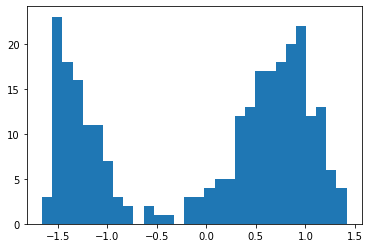

In [2]:
data = pd.read_csv("../../data/old_faithful.tsv", sep="\t")
data = data["eruptions"].values
data = (data - data.mean())/data.std()

_ = plt.hist(data, bins=30)

In [3]:
K = 30

In [10]:
with pm.Model():
    alpha = pm.Gamma("alpha", 1., 1.)
    sbw = pm.StickBreakingWeights("sbw", alpha, K=K)
    
    µ = pm.Normal("µ", 0., 5., shape=(K+1))
    σ = pm.Gamma("σ", 1., 1., shape=(K+1))
    λ = pm.Uniform("λ", 0., 5., shape=(K+1))
    
    mix = pm.Mixture(
        "mix",
        w=sbw,
        comp_dists=[pm.Normal.dist(mu=µ[j], sigma=σ[j]*λ[j]) for j in range(K+1)],
        observed=data,
    )
    
    trace = pm.sample(draws=20000, tune=5000, chains=1)

Sequential sampling (1 chains in 1 job)
NUTS: [alpha, sbw, µ, σ, λ]


/Users/larryshamalama/Documents/GitHub/pymc3-playground/notebooks/dirichlet-process-brainstorm/../../../pymc/pymc/step_methods/hmc/quadpotential.py:258: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(1, self._stds, out=self._inv_stds)
/Users/larryshamalama/Documents/GitHub/pymc3-playground/notebooks/dirichlet-process-brainstorm/../../../pymc/pymc/step_methods/hmc/quadpotential.py:237: RuntimeWarning: invalid value encountered in multiply
  return np.multiply(self._var, x, out=out)


ValueError: Mass matrix contains zeros on the diagonal. 
The derivative of RV `alpha_log__`.ravel()[[]] is zero.
The derivative of RV `sbw_simplex__`.ravel()[[]] is zero.
The derivative of RV `µ`.ravel()[[3]] is zero.
The derivative of RV `σ_log__`.ravel()[[]] is zero.
The derivative of RV `λ_interval__`.ravel()[[]] is zero.

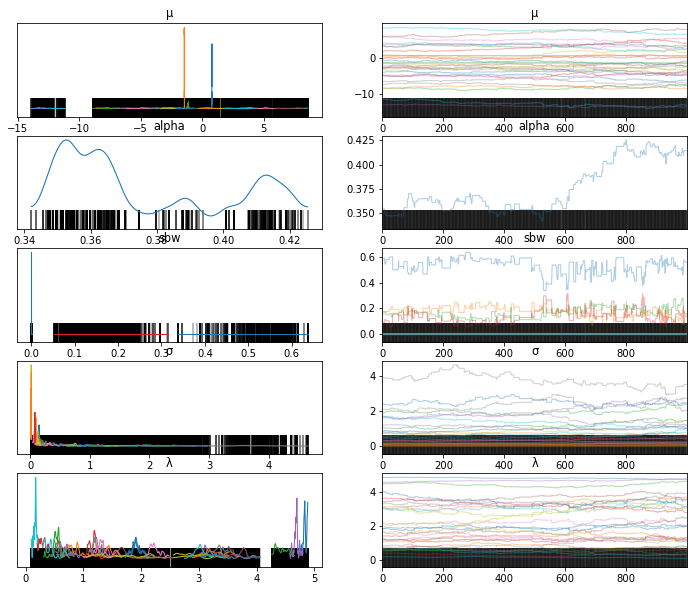

In [9]:
_ = az.plot_trace(trace)

In [11]:
trace.to_dict()

/Users/larryshamalama/opt/anaconda3/envs/pymc-dev-py39/lib/python3.9/site-packages/arviz/data/inference_data.py:454: UserWarning: The attributes are not same for all groups. Considering only the first group `attrs`
  warnings.warn(


defaultdict(dict,
            {'posterior': {'µ': array([[[ 0.80217954, -1.43999294, -1.1453504 , ..., -1.33121531,
                        4.23738211, -0.3908096 ],
                      [ 0.80085131, -1.44198637, -1.13736606, ..., -1.26577869,
                        4.24638923, -0.50099841],
                      [ 0.80085131, -1.44198637, -1.13736606, ..., -1.26577869,
                        4.24638923, -0.50099841],
                      ...,
                      [ 0.77300417, -1.44742651, -1.20751344, ..., -3.29260396,
                        2.66029613, -2.08506192],
                      [ 0.77300417, -1.44742651, -1.20751344, ..., -3.29260396,
                        2.66029613, -2.08506192],
                      [ 0.77300417, -1.44742651, -1.20751344, ..., -3.29260396,
                        2.66029613, -2.08506192]]]),
              'alpha': array([[0.35674005, 0.35458189, 0.35458189, 0.35458189, 0.35458189,
                      0.35458189, 0.35458189, 0.35458189, 0.349